This file has code for K Means clustering and its output will be compared with sklearn Library to check the accuracy

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("clustering.csv")
df = df[["ApplicantIncome", "LoanAmount"]]

df.head()

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0
2,2583,120.0
3,6000,141.0
4,2333,95.0


Final Centroids: [[2481.17977528   97.98876404]
 [4006.11320755  108.96855346]
 [6484.06818182  118.90909091]]


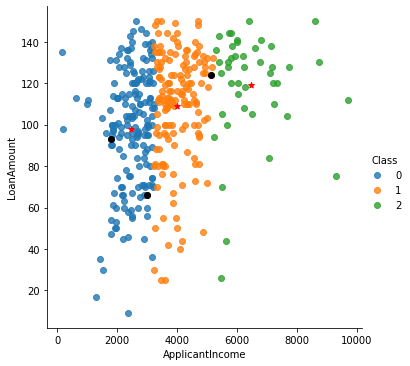

In [43]:
def kmeans(k, df):
    final_centroids = []
    for i in range(0, k):
        #Select random centriod values based on n_clusters (3 in this case)
        centroids = df.iloc[np.random.randint(0, df.shape[0]), :]
        final_centroids.append(centroids)
    final_centroids= np.array(final_centroids)
    initial_centroids = final_centroids
    lst_k = list(range(0,final_centroids.shape[1]))

    while True:
        C=[]
        #Iterating through the dataframe
        for index, row in df.iterrows():
            datapoints = []
            nearest_centroid = []
            datapoints.append(df.iloc[index, :])
            datapoints = np.array(datapoints)
            for centroid in final_centroids:
                #Find the euclidian distance between the centroid values and each datapoint
                euclidian_distance = np.linalg.norm(centroid-datapoints)
                nearest_centroid.append(euclidian_distance)
            #Select the nearest centroid
            C.append(np.argmin(nearest_centroid))
        df1 = pd.DataFrame(C, columns=["Class"])
        df = pd.concat([df, df1], axis=1)
        
        mean_value = []
        for i in range(0, len(final_centroids)):
            #Calculate the mean value of each category to get new centroid values
            p = np.mean(df[df["Class"]==i], axis=0)
            mean_value.append(p[lst_k])
        mean_value = np.array(mean_value)
        
        #Find the difference between the current centroid and the provious centroid
        diff = mean_value-final_centroids
        final_centroids = mean_value

        #Repeat the process until the difference of centroid value is 0
        if np.all(diff)!=0:     
            df = df.drop(["Class"], axis=1)
        else:
            break
    
    return df, final_centroids, initial_centroids
      
m, final_centroids, initial_centroids = kmeans(3, df)
print("Final Centroids:", final_centroids)
sns.lmplot(x='ApplicantIncome', y='LoanAmount', data=m, hue='Class', fit_reg=False)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='red', marker='*') #Final Centroid Values
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], color='black', marker='o') #Initial Centroid values
plt.show()

Final Centroids: [[2506.41304348   97.58695652]
 [6512.76744186  119.48837209]
 [4043.45454545  109.77922078]]


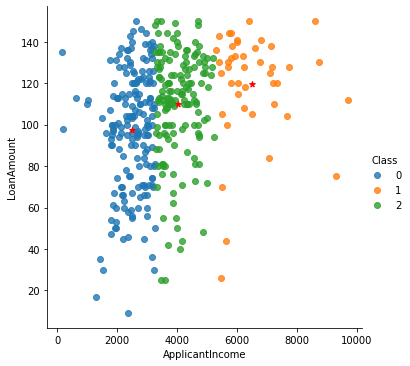

In [42]:
#Clustering the data using sklearn
from sklearn.cluster import KMeans
df2=df
model=KMeans(n_clusters=3)
model.fit(df2)
y_pred = model.predict(df2)
df3 = pd.DataFrame(y_pred, columns=['Class'])
df2 = pd.concat([df2, df3], axis=1)
print("Final Centroids:", model.cluster_centers_) #Final Centroid values using sklearn
sns.lmplot(x='ApplicantIncome', y='LoanAmount', data=df2, hue='Class', fit_reg=False)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='red', marker='*')
plt.show()

The shows that both models are returning similiar results with centroid values almost being almost equal